# Visualize predictions and targets of tile-wise segmentation

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import torchvision

In [3]:
task = "tile_segmentation"
dataset = "val"
predictions = torch.load(f"../models/{task}/{dataset}_predictions.pt").squeeze()
targets = torch.load(f"../models/{task}/{dataset}_targets.pt").squeeze()

predictions = torchvision.transforms.functional.center_crop(predictions, (50, 50))
targets = torchvision.transforms.functional.center_crop(targets, (50, 50))

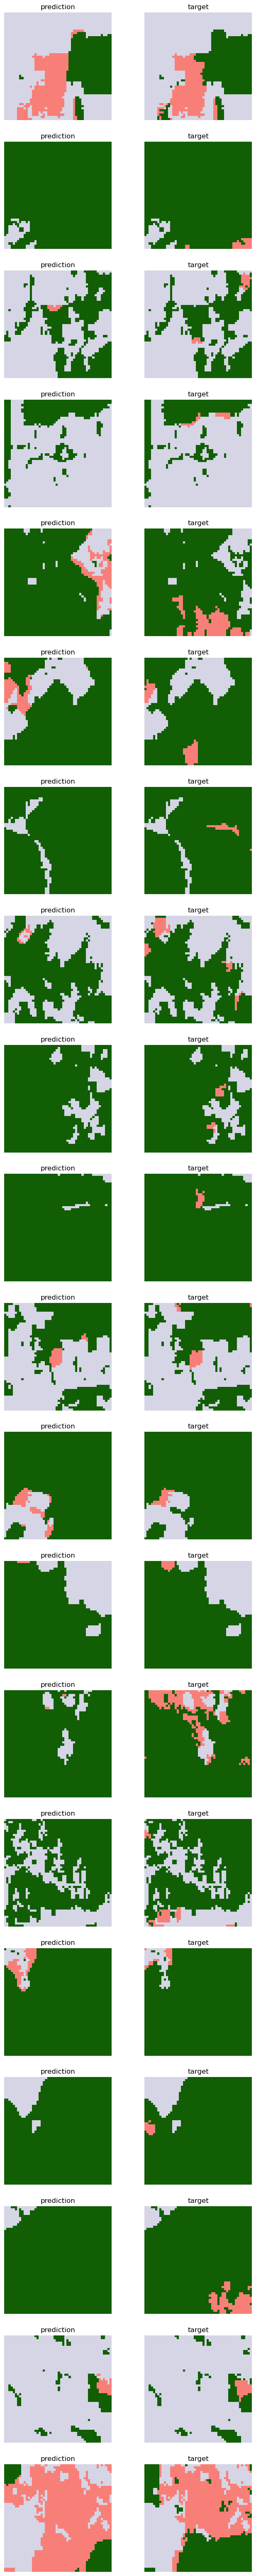

In [10]:
nr_plots = 20
fig, axs = plt.subplots(nr_plots, 2, figsize=(8, 4*nr_plots))
titles = ["prediction", "target"]
green = "#115E05"
red = "#F87F78"
cmap = colors.ListedColormap(
    ['#D5D5E5', green, red])
plotted = 0
i = 0
while plotted < nr_plots:
    target = targets[i]
    prediction = predictions[i]
    prediction = (prediction > 0.5).float()
    prediction[target == -1] = -1
    sample = (prediction, target)
    if torch.count_nonzero(sample[1] == 1) > 20:
        for idx in range(2):
            mat = axs[plotted, idx].imshow(sample[idx], cmap=cmap, vmin=-1.5, vmax=1.5, interpolation='nearest')
            # cax = plt.colorbar(mat, ticks=np.arange(-1, 2), ax=axs[plotted, idx])
            # cax.ax.set_yticklabels(['unknown', 'primary', 'prim. defores.'])
            axs[plotted, idx].set_title(titles[idx])
            axs[plotted, idx].axis('off')
        plotted += 1
    i += 1
plt.show()